# Buffer extraction analysis

In this notebook, we analyze the extraction of biomarkers from samples using different buffers.

**Note**: all the plots are done using $log([BMK])$ otherwise the plots are displaying poorly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal


In [2]:
# Load the data/extraction.csv file
data = pd.read_csv('data/extraction.csv')

In [3]:
# remove " (ng/mL)" from the column names
data.columns = data.columns.str.replace(' (ng/mL)', '')
data.columns = data.columns.str.replace(' (mg/mL)', '')

In [4]:
BIOMARKERS = ["MMP9", "HSPB1", "PERM", "KPYM", "AGRIN", "TOTAL PROTEIN"]

In [5]:
# Make BIOMARKERS columns float, and set to NaN if it fails
for biomarker in BIOMARKERS:
    data[biomarker] = pd.to_numeric(data[biomarker], errors='coerce')

In [6]:
# Create log transformed columns for each biomarker
for biomarker in BIOMARKERS:
    data[biomarker + "_log"] = data[biomarker].apply(lambda x: np.log(x) if x > 0 else 0)

In [7]:
# Buffers are the distinct values in the "Buffer" column
BUFFERS = data["Buffer"].unique()

## Distribution of biomarker readout on different buffers, considering all samples

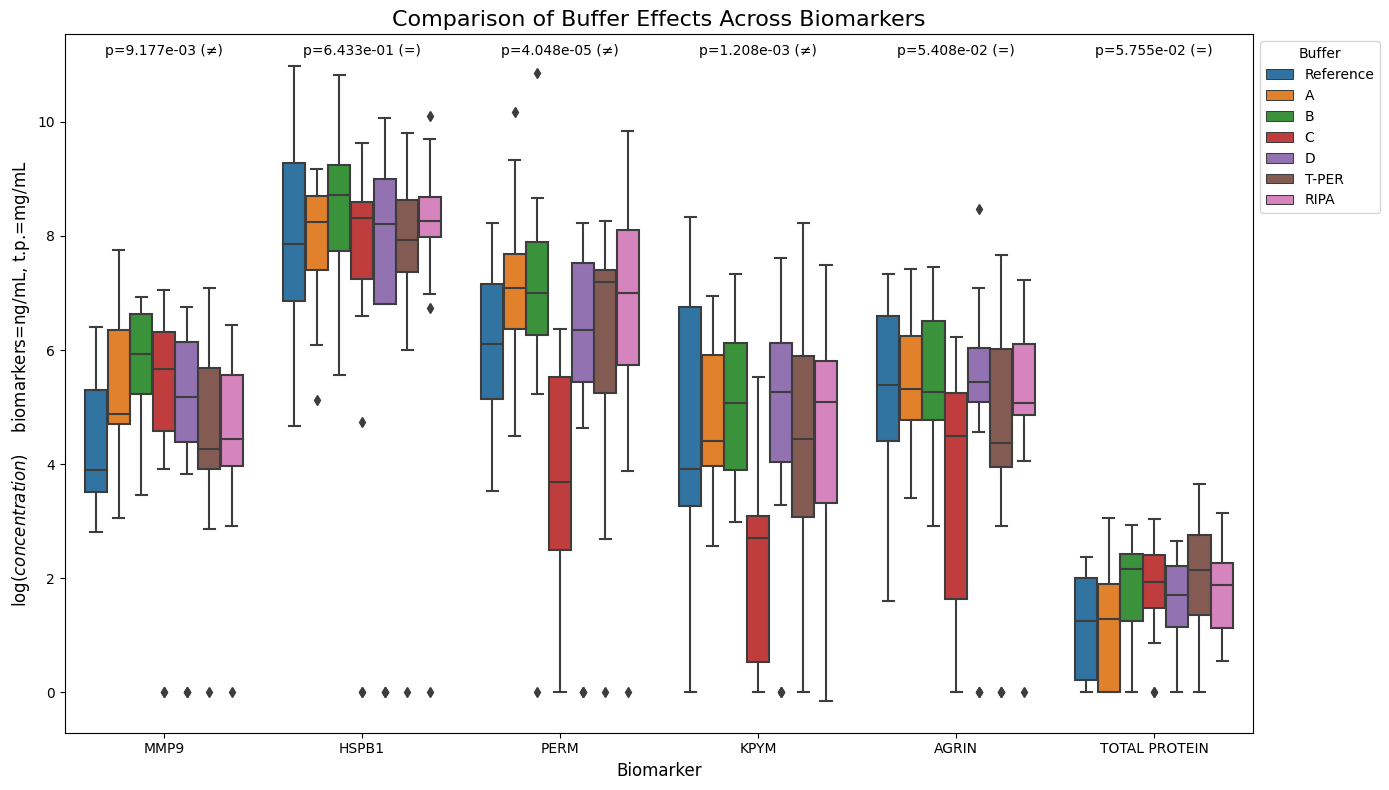

In [8]:
# Prepare the data for plotting
data_melted = pd.melt(
    data,
    id_vars=["Buffer"],
    value_vars=[f"{biomarker}_log" for biomarker in BIOMARKERS],
    var_name="Biomarker",
    value_name="Value",
)

# Clean the biomarker names for better display
data_melted["Biomarker"] = data_melted["Biomarker"].str.replace("_log", "")

buffer_order = ["Reference", "A", "B", "C", "D", "T-PER", "RIPA"]

# Convert 'Buffer' column to a categorical type with the specified order
data_melted["Buffer"] = pd.Categorical(data_melted["Buffer"], categories=buffer_order, ordered=True)


# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=data_melted, x="Biomarker", y="Value", hue="Buffer", ax=ax)

# Perform Kruskal-Wallis test and annotate results
for biomarker in BIOMARKERS:
    biomarker_name = biomarker  # Original name for testing
    biomarker_label = biomarker.replace("_log", "")  # Cleaned name for plotting
    
    # Extract values for each buffer within the biomarker group
    buffer_groups = data[data[f"{biomarker}_log"].notna()].groupby("Buffer")[f"{biomarker}_log"].apply(list)
    
    # Perform Kruskal-Wallis test
    kw_stat, kw_pvalue = kruskal(*buffer_groups)
    
    # Add the p-value as an annotation
    sign = "≠" if kw_pvalue < 0.05 else "="
    ax.text(
        BIOMARKERS.index(biomarker),  # X-axis position based on biomarker index
        data_melted["Value"].max() + 0.2,  # Position above the max value
        f"p={kw_pvalue:.3e} ({sign})",
        fontsize=10,
        color="black",
        ha="center",
    )

# Customize the plot
ax.set_title("Comparison of Buffer Effects Across Biomarkers", fontsize=16)
ax.set_ylabel("log($concentration$)    biomarkers=ng/mL, t.p.=mg/mL", fontsize=12)
ax.set_xlabel("Biomarker", fontsize=12)
ax.legend(title="Buffer", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()


Buffer "B" and "RIPA" appears to have the better extraction. When eliminating buffer "C" all the groups have the same distribution except for MMP9, where the "Reference" buffer is significatively different. The performed test was computed for the whole group using Kruskal-Wallis Method.

### Considering just Benign samples

For illustrative purposes, in order to consider buffer extraction all samples must be taken into account.

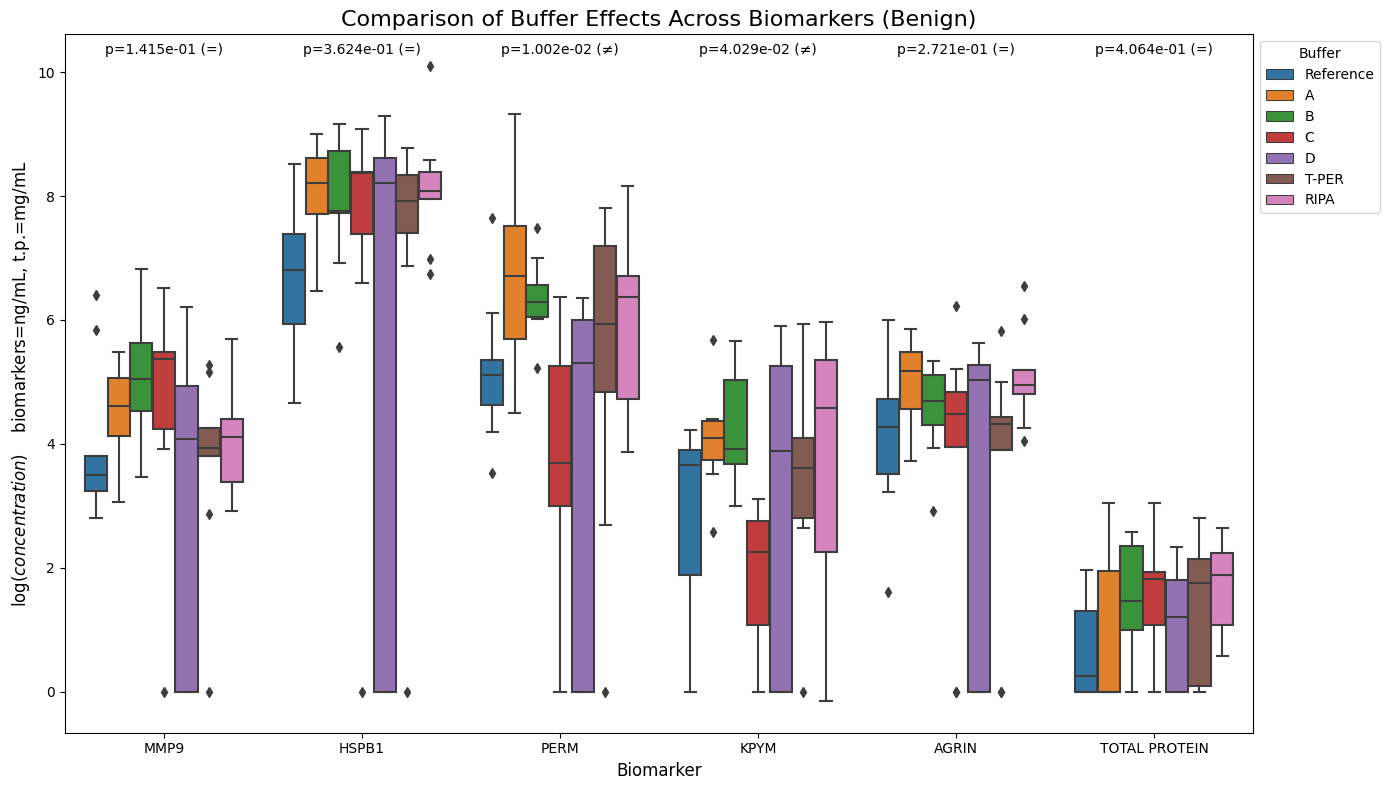

In [9]:
# Just keep "Benign" in "Diagnostic" column
data_copy = data.copy()

data = data[data["Diagnostic"]== "Benign"]

# Prepare the data for plotting
data_melted = pd.melt(
    data,
    id_vars=["Buffer"],
    value_vars=[f"{biomarker}_log" for biomarker in BIOMARKERS],
    var_name="Biomarker",
    value_name="Value",
)

# Clean the biomarker names for better display
data_melted["Biomarker"] = data_melted["Biomarker"].str.replace("_log", "")

buffer_order = ["Reference", "A", "B", "C", "D", "T-PER", "RIPA"]

# Convert 'Buffer' column to a categorical type with the specified order
data_melted["Buffer"] = pd.Categorical(data_melted["Buffer"], categories=buffer_order, ordered=True)


# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=data_melted, x="Biomarker", y="Value", hue="Buffer", ax=ax)

# Perform Kruskal-Wallis test and annotate results
for biomarker in BIOMARKERS:
    biomarker_name = biomarker  # Original name for testing
    biomarker_label = biomarker.replace("_log", "")  # Cleaned name for plotting
    
    # Extract values for each buffer within the biomarker group
    buffer_groups = data[data[f"{biomarker}_log"].notna()].groupby("Buffer")[f"{biomarker}_log"].apply(list)
    
    # Perform Kruskal-Wallis test
    kw_stat, kw_pvalue = kruskal(*buffer_groups)
    
    # Add the p-value as an annotation
    sign = "≠" if kw_pvalue < 0.05 else "="
    ax.text(
        BIOMARKERS.index(biomarker),  # X-axis position based on biomarker index
        data_melted["Value"].max() + 0.2,  # Position above the max value
        f"p={kw_pvalue:.3e} ({sign})",
        fontsize=10,
        color="black",
        ha="center",
    )

# Customize the plot
ax.set_title("Comparison of Buffer Effects Across Biomarkers (Benign)", fontsize=16)
ax.set_ylabel("log($concentration$)    biomarkers=ng/mL, t.p.=mg/mL", fontsize=12)
ax.set_xlabel("Biomarker", fontsize=12)
ax.legend(title="Buffer", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Considering just Cancer samples

For illustrative purposes, in order to consider buffer extraction all samples must be taken into account.

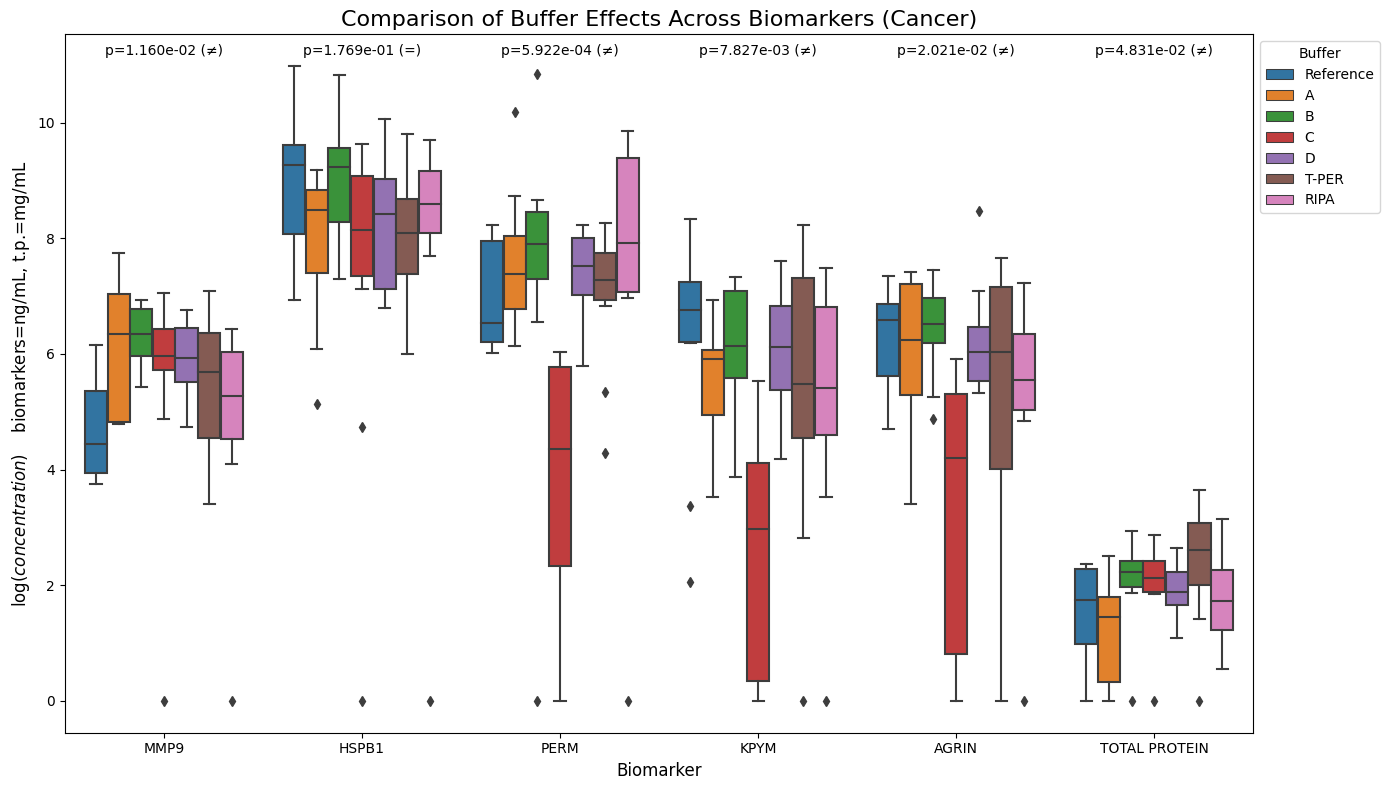

In [10]:
# Just keep "Benign" in "Diagnostic" column
data = data_copy.copy()

data = data[data["Diagnostic"] != "Benign"]

# Prepare the data for plotting
data_melted = pd.melt(
    data,
    id_vars=["Buffer"],
    value_vars=[f"{biomarker}_log" for biomarker in BIOMARKERS],
    var_name="Biomarker",
    value_name="Value",
)

# Clean the biomarker names for better display
data_melted["Biomarker"] = data_melted["Biomarker"].str.replace("_log", "")

buffer_order = ["Reference", "A", "B", "C", "D", "T-PER", "RIPA"]

# Convert 'Buffer' column to a categorical type with the specified order
data_melted["Buffer"] = pd.Categorical(data_melted["Buffer"], categories=buffer_order, ordered=True)


# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=data_melted, x="Biomarker", y="Value", hue="Buffer", ax=ax)

# Perform Kruskal-Wallis test and annotate results
for biomarker in BIOMARKERS:
    biomarker_name = biomarker  # Original name for testing
    biomarker_label = biomarker.replace("_log", "")  # Cleaned name for plotting
    
    # Extract values for each buffer within the biomarker group
    buffer_groups = data[data[f"{biomarker}_log"].notna()].groupby("Buffer")[f"{biomarker}_log"].apply(list)
    
    # Perform Kruskal-Wallis test
    kw_stat, kw_pvalue = kruskal(*buffer_groups)
    
    # Add the p-value as an annotation
    sign = "≠" if kw_pvalue < 0.05 else "="
    ax.text(
        BIOMARKERS.index(biomarker),  # X-axis position based on biomarker index
        data_melted["Value"].max() + 0.2,  # Position above the max value
        f"p={kw_pvalue:.3e} ({sign})",
        fontsize=10,
        color="black",
        ha="center",
    )

# Customize the plot
ax.set_title("Comparison of Buffer Effects Across Biomarkers (Cancer)", fontsize=16)
ax.set_ylabel("log($concentration$)    biomarkers=ng/mL, t.p.=mg/mL", fontsize=12)
ax.set_xlabel("Biomarker", fontsize=12)
ax.legend(title="Buffer", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()
